# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing and exploring the data

In [4]:
df = pd.read_csv('manufacturing.csv')
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


<AxesSubplot:xlabel='Number of Units', ylabel='Manufacturing Cost'>

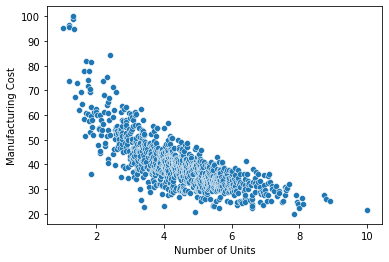

In [6]:
sns.scatterplot(data= df, x='Number of Units' , y='Manufacturing Cost')

<AxesSubplot:xlabel='Number of Units', ylabel='Manufacturing Cost'>

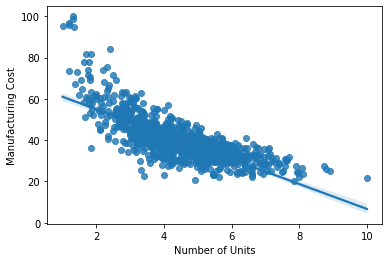

In [12]:
sns.regplot(data= df, x='Number of Units' , y='Manufacturing Cost')

# data preprcessing

In [21]:
X = df['Number of Units'].values.reshape(-1,1)
X

array([[ 1.        ],
       [ 1.18599365],
       [ 1.19149864],
       [ 1.2047714 ],
       [ 1.29877282],
       [ 1.30743503],
       [ 1.3393857 ],
       [ 1.3790436 ],
       [ 1.41999951],
       [ 1.47394834],
       [ 1.54089845],
       [ 1.57459986],
       [ 1.62030979],
       [ 1.63199723],
       [ 1.65268704],
       [ 1.69580103],
       [ 1.70421427],
       [ 1.73920139],
       [ 1.76014627],
       [ 1.76700188],
       [ 1.77728035],
       [ 1.7843415 ],
       [ 1.80208917],
       [ 1.81591741],
       [ 1.82328911],
       [ 1.83109722],
       [ 1.83240661],
       [ 1.84287574],
       [ 1.84584064],
       [ 1.86522775],
       [ 1.87414418],
       [ 1.89573077],
       [ 1.9430286 ],
       [ 1.9877704 ],
       [ 1.99190237],
       [ 2.00480379],
       [ 2.05231674],
       [ 2.06492056],
       [ 2.07583577],
       [ 2.1052735 ],
       [ 2.11329869],
       [ 2.11858955],
       [ 2.14190876],
       [ 2.15159002],
       [ 2.17131692],
       [ 2

In [22]:
y= df['Manufacturing Cost'].values.reshape(-1,1)
y

array([[ 95.06605578],
       [ 96.53174997],
       [ 73.66131056],
       [ 95.5668425 ],
       [ 98.77701266],
       [100.        ],
       [ 94.75975637],
       [ 67.18538349],
       [ 72.88604061],
       [ 61.96769605],
       [ 69.28409692],
       [ 64.55249643],
       [ 77.67937742],
       [ 58.42664546],
       [ 51.4409698 ],
       [ 60.92903611],
       [ 81.86775617],
       [ 60.5725967 ],
       [ 74.12260141],
       [ 71.61417311],
       [ 77.98340868],
       [ 57.68193975],
       [ 52.96440828],
       [ 69.1787313 ],
       [ 70.42005203],
       [ 36.08580039],
       [ 81.49469151],
       [ 59.64067983],
       [ 63.40954945],
       [ 55.03613926],
       [ 58.06045968],
       [ 52.11412489],
       [ 61.27727337],
       [ 62.5960052 ],
       [ 61.23299391],
       [ 60.02154297],
       [ 47.88555562],
       [ 54.90274827],
       [ 54.17817589],
       [ 60.21890139],
       [ 44.71285113],
       [ 45.64983585],
       [ 57.80822022],
       [ 52

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [141]:
po = PolynomialFeatures(degree=4)
X_poly = po.fit_transform(X)
X_poly

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, 1.66819606e+00,
        1.97846993e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, 1.69153369e+00,
        2.01546010e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, 6.77041565e+02,
        5.94502623e+03],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, 7.04422522e+02,
        6.26774007e+03],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04]])

# Building the Model

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y)

LinearRegression()

In [144]:
reg_poly.coef_

array([[ 0.00000000e+00, -5.43308190e+01,  1.22452385e+01,
        -1.29910949e+00,  5.12914120e-02]])

In [145]:
reg_poly.intercept_

array([131.71715954])

# model evauation

In [146]:
reg_poly.score(X_poly,y)

0.693152396881535

In [147]:
reg_poly.predict(X_poly).shape

(1000, 1)

Text(0.5, 1.0, 'Unit Cost vs. Number of Units')

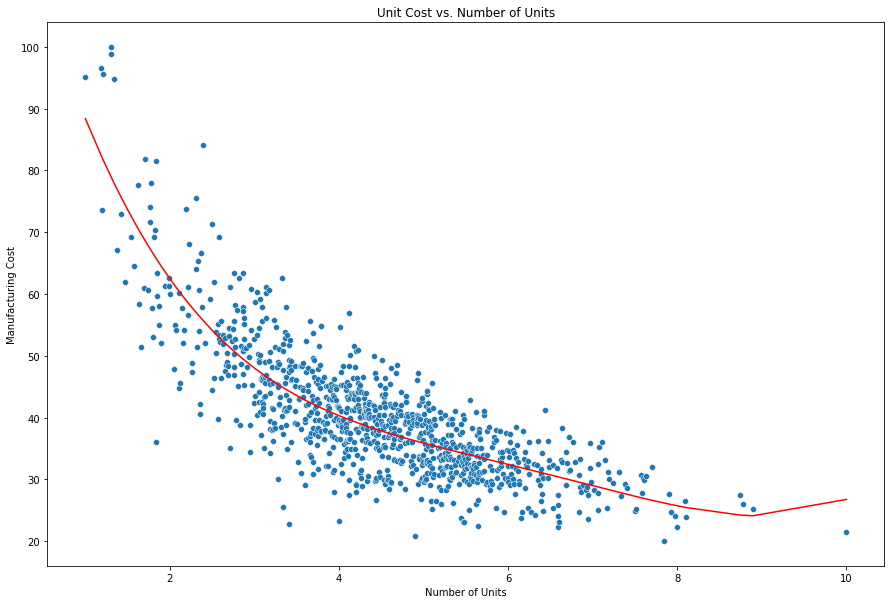

In [151]:
plt.figure(figsize=(15,10))
sns.scatterplot(data= df, x='Number of Units' , y='Manufacturing Cost')
plt.plot(X, reg_poly.predict(X_poly), c='r')
plt.title('Unit Cost vs. Number of Units')

# finding the best degree

In [139]:
r2_s = []

In [140]:
for i in range(1,11):
    pol = PolynomialFeatures(degree=i)
    X_p = pol.fit_transform(X)
    reg = LinearRegression()
    reg.fit(X_p, y)
    r2_s.append(reg.score(X_p,y))

In [92]:
r2_s

[0.5789767558506287,
 0.6650268116056028,
 0.687325124688785,
 0.693152396881535,
 0.6961040568996413,
 0.6978344545872395,
 0.6987812473173708,
 0.6994954405163043,
 0.7003246087398594,
 0.7021227567853539]

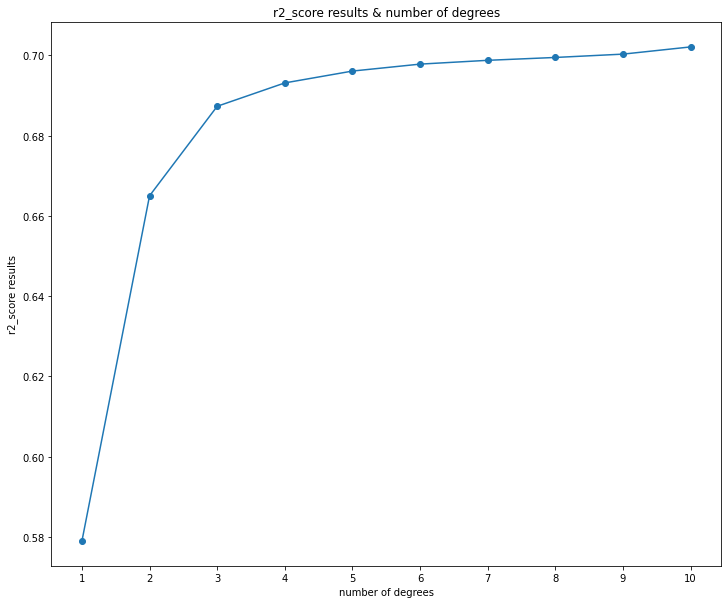

In [163]:
plt.figure(figsize=(12,10))
plt.plot(range(1,11), r2_s, '-o')
plt.xticks(range(1,11))
plt.title('r2_score results & number of degrees')
plt.xlabel('number of degrees')
plt.ylabel('r2_score results')
plt.show()

### the best degree seems to be the 3rd or the 4th 

## =========================

# THANK YOU!